In [38]:
# K-Means Clustering

# Importing the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
# Importing the cars.csv dataset
dataset = pd.read_csv('data/cars.csv')

#print first 10 rows of X
dataset.head(10)

#construct X
X = dataset.iloc[:, :-1]

X = X.convert_objects(convert_numeric=True)

X.head()

/home/shreya/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:10: FutureWarning: convert_objects is deprecated.  Use the data-type specific converters pd.to_datetime, pd.to_timedelta and pd.to_numeric.
  # Remove the CWD from sys.path while we load stuff.


,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
0,14.0,8,350.0,165,4209.0,12,1972
1,31.9,4,89.0,71,1925.0,14,1980
2,17.0,8,302.0,140,3449.0,11,1971
3,15.0,8,400.0,150,3761.0,10,1971
4,30.5,4,98.0,63,2051.0,17,1978


In [40]:
#print first 5 rows of X

In [49]:
#describe X
X.describe()

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


In [50]:
X.isnull().any()
# Eliminating null values

for col in X.columns:
    X[col] = X[col].fillna(X[col].mean())

# X.columns
# X[' cubicinches'] = X[' cubicinches'].fillna(X[' cubicinches'].mean())
X.describe()
# X[' cubicinches'].fillna

,mpg,cylinders,cubicinches,hp,weightlbs,time-to-60,year
count,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000,261.000000
mean,23.144828,5.590038,200.918919,106.360153,3009.833333,15.547893,1976.819923
std,7.823570,1.733310,108.837269,40.499959,849.097575,2.910625,3.637696
min,10.000000,3.000000,68.000000,46.000000,1613.000000,8.000000,1971.000000
25%,16.900000,4.000000,101.000000,75.000000,2254.000000,14.000000,1974.000000
50%,22.000000,6.000000,156.000000,95.000000,2904.000000,16.000000,1977.000000
75%,28.800000,8.000000,302.000000,138.000000,3664.000000,17.000000,1980.000000
max,46.600000,8.000000,455.000000,230.000000,4997.000000,25.000000,1983.000000


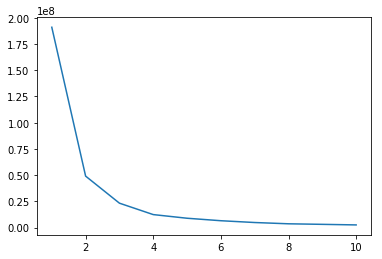

In [56]:
# Using the elbow method to find  the optimal number of clusters

#import kmeans 
from sklearn.cluster import KMeans
wcss = []

for i in range(1,11):
    #initialise k means instance
    kmeans = KMeans(n_clusters=i)
    #fit the data
    kmeans.fit(X)
    
    wcss.append(kmeans.inertia_)
    
#plot cluster vs wcss
plt.plot(range(1, 11), wcss)

In [61]:
# Applying k-means to the cars dataset
kmeans = KMeans(n_clusters=3,init='k-means++',max_iter=300,n_init=10,random_state=0) 
y_kmeans = kmeans.fit_predict(X)

X = X.as_matrix(columns=None)
# type(X)

In [62]:
y_kmeans

array([2, 1, 0, 2, 1, 2, 2, 2, 0, 1, 1, 1, 2, 0, 0, 2, 1, 0, 1, 1, 1, 1,
       0, 2, 1, 1, 1, 2, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 2, 0, 2, 2, 0, 0,
       0, 1, 2, 1, 1, 0, 2, 0, 0, 1, 2, 2, 0, 1, 1, 2, 0, 1, 0, 1, 2, 0,
       1, 1, 1, 2, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 2, 2, 0, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 2, 0, 1, 2, 2, 0, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 0,
       1, 0, 2, 1, 1, 2, 0, 0, 1, 2, 1, 1, 2, 0, 1, 1, 2, 1, 1, 1, 1, 1,
       2, 0, 2, 2, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 2, 0,
       1, 0, 1, 1, 1, 0, 0, 2, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 1,
       2, 0, 0, 1, 0, 1, 2, 0, 1, 0, 0, 2, 2, 2, 1, 1, 2, 2, 2, 1, 1, 1,
       1, 1, 1, 1, 0, 0, 1, 2, 1, 0, 2, 0, 0, 0, 1, 1, 0, 1, 1, 2, 1, 2,
       0, 0, 2, 2, 2, 1, 2, 1, 1, 0, 0, 1, 1, 2, 0, 1, 2, 0, 1, 1, 2, 0,
       2, 1, 2, 0, 2, 1, 1, 1, 1, 1, 0, 2, 0, 1, 2, 1, 0, 0, 0],
      dtype=int32)

In [63]:
X.head()

AttributeError: 'numpy.ndarray' object has no attribute 'head'

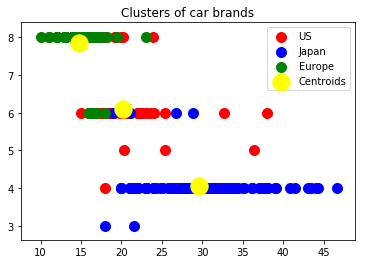

In [68]:
# Visualising the clusters
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0,1],s=100,c='red',label='US')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1,1],s=100,c='blue',label='Japan')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2,1],s=100,c='green',label='Europe')
plt.scatter(kmeans.cluster_centers_[:,0],kmeans.cluster_centers_[:,1],s=300,c='yellow',label='Centroids')
plt.title('Clusters of car brands')
plt.legend()
plt.show()